In [1]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ill = pd.read_csv("bydate.csv")

In [4]:
df = ill

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
avg_month = df.groupby(pd.PeriodIndex(df['date'], freq="M")).mean()

In [7]:
avg_month.to_excel("avg_month.xlsx")

In [8]:
original_fg_df = pd.read_csv("original_fg_df.csv")
original_fg_df

,Month,Social Games,Non-Social Games
0,2018-03,1125914.48,869606.63
1,2018-04,1110157.11,749601.71
2,2018-05,1164441.65,689100.25
3,2018-06,1209147.55,769382.71
4,2018-07,1238604.02,781231.45
5,2018-08,1179948.13,709863.79
6,2018-09,1075539.23,750085.18
7,2018-10,1029386.58,731669.90
8,2018-11,1102824.31,741414.42
9,2018-12,1156907.46,875275.60


In [9]:
avg_month = pd.read_excel('avg_month.xlsx')

In [10]:
avg_month['date'] = pd.to_datetime(avg_month['date'], format='%Y-%m')

In [11]:
original_fg_df['Month'] = pd.to_datetime(original_fg_df['Month'], format='%Y-%m')

In [12]:
m = pd.merge(avg_month, original_fg_df, left_on = 'date', right_on = 'Month', how = 'inner')

In [13]:
m = m.drop('Month', axis = 1)

In [14]:
m = m.drop(['sum','month', 'year'], axis = 1)

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Corona Cases with Social and Non-social Game')]

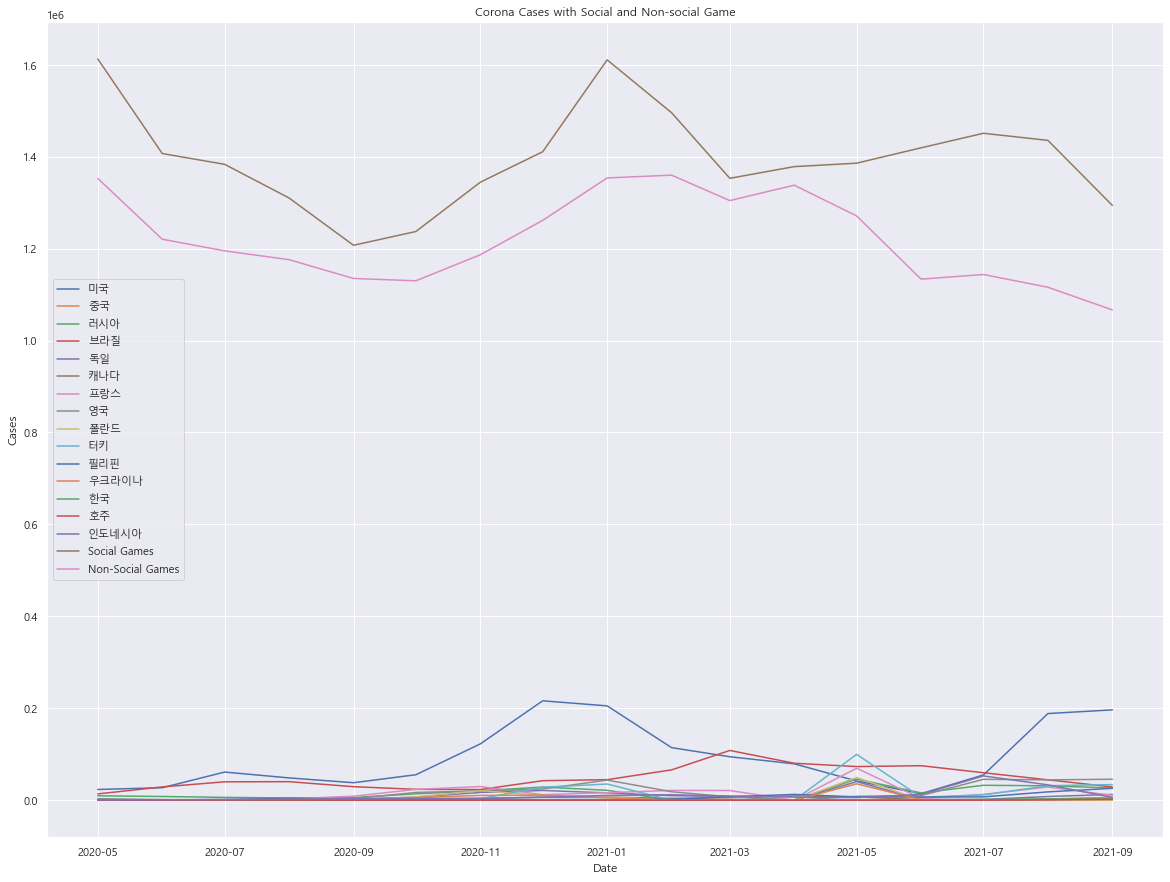

In [16]:
clst = list(m.columns[1:])

sns.set(rc={'figure.figsize':(20,15)})
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

for i in clst:
    ax = sns.lineplot(x="date" ,y = i, data=m)
plt.legend(labels=clst)
ax.set(xlabel='Date', ylabel='Cases', title='Corona Cases with Social and Non-social Game')

In [17]:
m.columns.values

array(['date', '미국', '중국', '러시아', '브라질', '독일', '캐나다', '프랑스', '영국', '폴란드',
       '터키', '필리핀', '우크라이나', '한국', '호주', '인도네시아', 'Social Games',
       'Non-Social Games'], dtype=object)

In [18]:
lst = list(m.columns.values)

for i in lst:
    for j in range(len(m[i])):
        if m[i][j] == 0:
            m[i][j] = 1

<ipython-input-18-f33604e39cec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m[i][j] = 1


In [19]:
#log transform
mlog = m.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [20]:
mlog

,date,미국,중국,러시아,브라질,독일,캐나다,프랑스,영국,폴란드,터키,필리핀,우크라이나,한국,호주,인도네시아,Social Games,Non-Social Games
0,2020-05-01,4.369517,0.626682,3.985392,4.138892,2.827800,3.104191,2.863620,3.531896,2.552019,3.155326,2.448294,2.630021,1.369216,1.153307,2.711667,6.207512,6.131173
1,2020-06-01,4.435137,1.247973,3.911301,4.462276,2.596707,2.660486,2.654177,3.115488,2.547488,3.073229,2.797521,2.833020,1.647383,1.232996,2.982181,6.148234,6.086511
2,2020-07-01,4.787444,1.411728,3.794967,4.602727,2.669797,2.583491,2.857196,2.811013,2.545147,3.003877,3.207877,2.909452,1.686175,2.406045,3.211258,6.140940,6.077396
3,2020-08-01,4.686635,1.387160,3.701281,4.606315,3.401084,2.592893,3.469442,3.016035,2.847871,3.095844,3.614642,3.191541,2.260071,2.507116,3.319965,6.117307,6.070399
4,2020-09-01,4.580988,1.073107,3.772026,4.469054,3.181062,2.924021,3.941609,3.542203,2.860657,3.197731,3.496731,3.467134,2.110028,1.698101,3.562400,6.081794,6.055004
5,2020-10-01,4.744004,1.264513,4.144294,4.375493,3.835533,3.368743,4.373199,4.229894,3.871439,3.248898,3.351541,3.748681,1.939841,1.228798,3.606679,6.092447,6.053072
6,2020-11-01,5.088519,1.268734,4.312147,4.366943,4.227630,3.608811,4.474319,4.307654,4.316604,3.538967,3.212924,4.020745,2.408805,0.997095,3.596718,6.128554,6.074305
7,2020-12-01,5.335083,1.226309,4.457786,4.628448,4.327083,3.826161,4.081728,4.386682,4.023879,4.450066,3.167679,4.045140,2.932523,1.180736,3.819419,6.149437,6.100861
8,2021-01-01,5.312407,1.901335,4.334476,4.650749,4.204604,3.832707,4.216793,4.642182,3.852791,4.547621,3.206626,3.722212,2.750807,1.155042,4.020084,6.206977,6.131536
9,2021-02-01,5.058395,1.226951,0.000000,4.819864,3.995244,3.607080,4.329225,4.265593,0.000000,0.000000,3.332135,0.000000,2.717179,0.000000,4.077267,6.174806,6.133476


In [32]:
mlog_1 = mlog[['date','미국', 'Social Games', 'Non-Social Games']]

In [35]:
mloglst = list(mlog_1.columns[1:])
mloglst

['미국', 'Social Games', 'Non-Social Games']

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Corona Cases with Social and Non-social Game')]

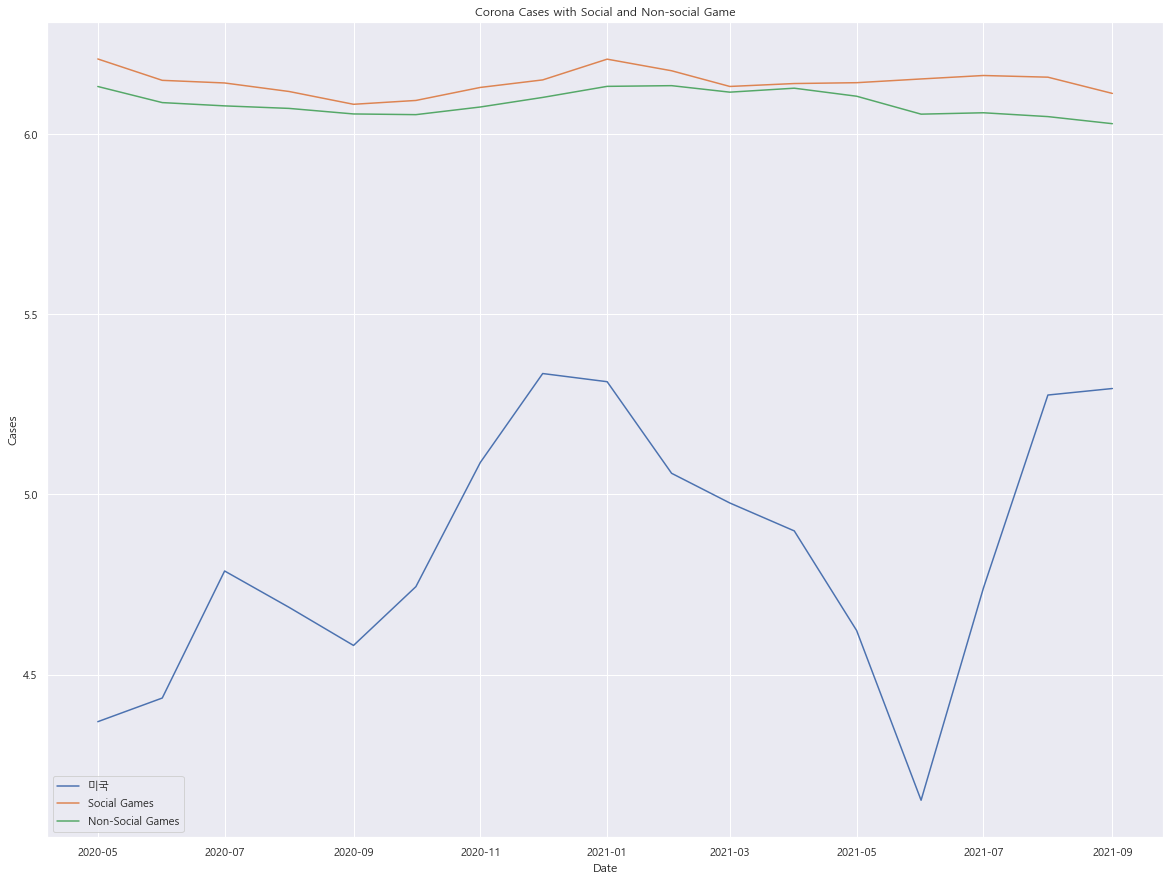

In [36]:
for i in mloglst:
    ax = sns.lineplot(x="date" ,y = i, data=mlog_1)
plt.legend(labels=mloglst)
ax.set(xlabel='Date', ylabel='Cases', title='Corona Cases with Social and Non-social Game')

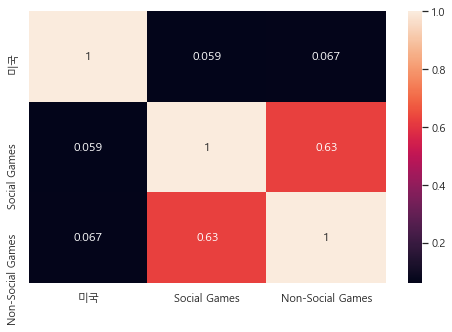

In [41]:
sns.set(rc={'figure.figsize':(8,5)})
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

corrMatrix = mlog_1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

막상 코드를 돌려보니 상관이 크게 없는 것으로 파악